# Neuralink Time Series Forecasting


## Imports


In [12]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from glob import glob
import scipy.io

## Configure Tensorflow


In [3]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.debugging.set_log_device_placement(True)

## Import Data


In [9]:
data_dir = "../../data/"
data_file_l = glob(data_dir + "*.wav")

In [14]:
rate, data = scipy.io.wavfile.read(data_file_l[0])

In [27]:
data_df = pd.DataFrame(data, columns=["Amplitude"])

In [32]:
time = np.arange(0, len(data_df) / rate, (1 / rate))

In [33]:
time

array([0.00000000e+00, 5.12006554e-05, 1.02401311e-04, ...,
       5.05329988e+00, 5.05335108e+00, 5.05340228e+00])

In [35]:
data_df.insert(loc=1, column="Time", value=time, allow_duplicates=True)

In [37]:
data_df = data_df.reindex(columns=["Time", "Amplitude"])

In [40]:
data_df.index.name = "Sample Number"

<Axes: title={'center': 'Raw Neural Signal'}, xlabel='Time [s]'>

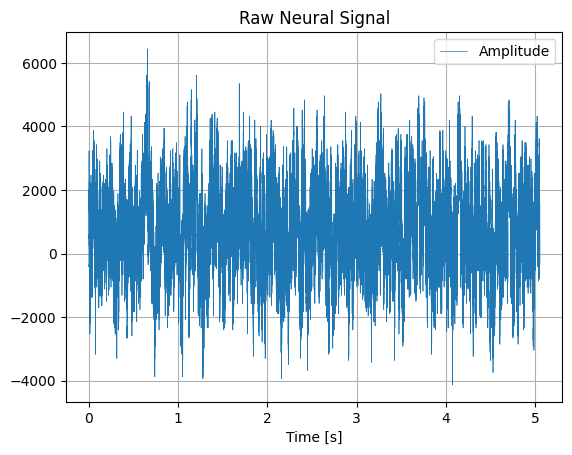

In [47]:
data_df.plot(
    xlabel="Time [s]", x="Time", grid=True, linewidth=0.5, title="Raw Neural Signal"
)

<Axes: xlabel='Sample Number'>

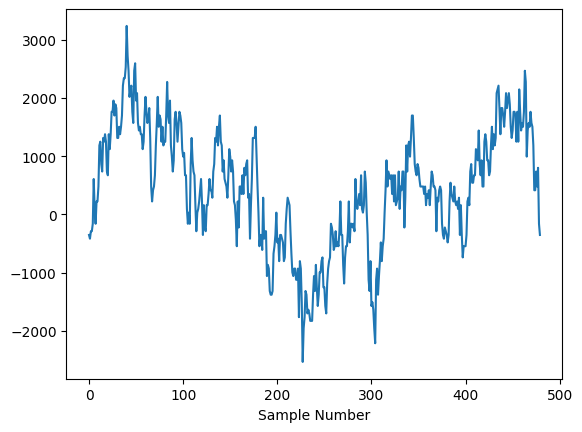

In [58]:
data_df["Amplitude"][:480].plot()

In [ ]:
class WindowGenerator:
    def __init__(
        self,
        input_width,
        label_width,
        shift,
        train_df=train_df,
        val_df=val_df,
        test_df=test_df,
        label_columns=None,
    ):
        # Store the raw data
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indicies = {name: i}